In [0]:
#804 Project
#Instacart Market Analysis
#Praful, Jamie, Daniel, Andrew
#Team Leader - Praf 

#Meeting Tuesday 7pm -
# https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b
# https://rstudio-pubs-static.s3.amazonaws.com/442983_dbe107383f4a4dc78abec2a4e8de02e0.html



In [0]:
#if you have permissions to the shared drive you should be able to access the csv files
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from pandas import set_option
from numpy import set_printoptions

In [0]:
# dataset imports
train_set = pd.read_csv('/content/gdrive/Shared drives/804 Instacart/804 project/order_products__train.csv')
aisles = pd.read_csv('/content/gdrive/Shared drives/804 Instacart/804 project/aisles.csv')
departments = pd.read_csv('/content/gdrive/Shared drives/804 Instacart/804 project/departments.csv')
order_products_prior = pd.read_csv('/content/gdrive/Shared drives/804 Instacart/804 project/order_products__prior.csv')

In [0]:
order_products_train = pd.read_csv('/content/gdrive/Shared drives/804 Instacart/804 project/order_products__train.csv')
orders = pd.read_csv('/content/gdrive/Shared drives/804 Instacart/804 project/orders.csv')
products = pd.read_csv('/content/gdrive/Shared drives/804 Instacart/804 project/products.csv')

In [0]:
# merging dataframes for EDA
master_df = pd.merge(order_products_prior, orders, on='order_id', how='left')
master_df = pd.merge(master_df, products, on='product_id', how='left')
master_df = pd.merge(master_df, aisles, on='aisle_id', how='left')
master_df = pd.merge(master_df, departments, on='department_id', how='left')
master_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [0]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


# EDA from other notebooks

In [0]:
#check for null values
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

days_since_prior_order has 206,209 null values, equal to the total number of users<br>
every user's first order has a null for this feature

In [0]:
# verify the number of users and orders
orders.nunique()

order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

206,209 unique user_id's(customers) and 3,421,083 unique orders placed


In [0]:
# total number of times each product has been ordered
train_df['product_name'].value_counts()[0:10]

Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Organic Avocado            7409
Organic Hass Avocado       7293
Strawberries               6494
Limes                      6033
Organic Raspberries        5546
Name: product_name, dtype: int64

count    3.42e+06
mean     1.72e+01
std      1.77e+01
min      1.00e+00
25%      5.00e+00
50%      1.10e+01
75%      2.30e+01
max      1.00e+02
Name: order_number, dtype: float64

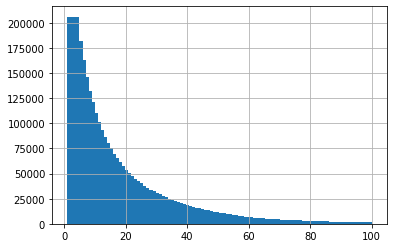

In [0]:
# order number histogram, shows a large number of customers have less than 10 orders and a some customers up to 100 different orders.
orders.order_number.hist(bins = 100)

pd.set_option('display.width',100)
pd.set_option('precision',2)
orders.order_number.describe()

In [0]:
# create a total buy number column
order_products_prior.head(10)
total_items = 
  

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


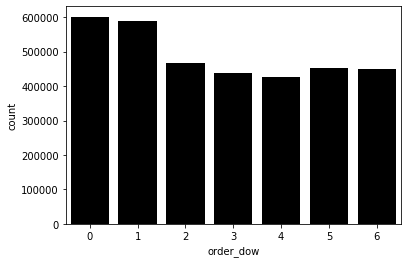

In [0]:
# days of the week histogram
sns.countplot(orders.order_dow, color = 'k')

Day 0 and Day 1 have a significant increase in orders. This is most likely Saturday and Sunday when poeple are restocking their food supplies for the upcoming week.

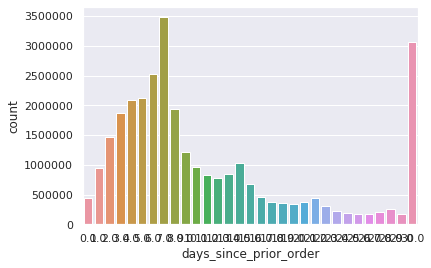

In [0]:
# histogram of order placements
sns.countplot(master_df.days_since_prior_order)

Significant increase in order frequency at 7 day intervals, disreguard the 30 day value because that column includes all days past 30


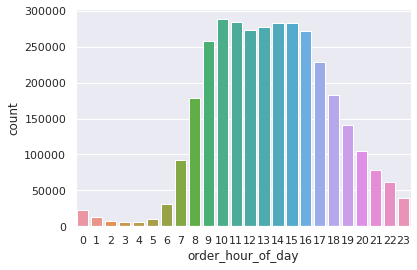

In [0]:
#hour of the day when order is placed
sns.countplot(orders.order_hour_of_day)

A majority of orders in a day are expected to occur between 9AM-5PM

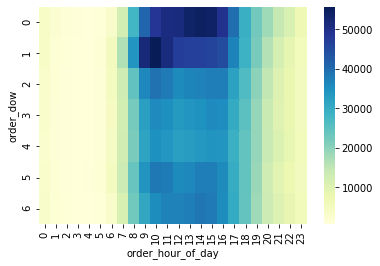

In [0]:
# heat map of when orders are placed during the week on an hourly chart
corMat = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
corMat = corMat.pivot('order_dow', 'order_hour_of_day', 'order_number')
sns.heatmap(corMat,cmap="YlGnBu")

Combination of previous two histograms. 9AM-5PM are the peak hours on all days. Large volume of orders are placed in the afternoon on Day 0(Saturday) and in the morning on Day1(Sunday)

In [0]:
orders.groupby(['order_hour_of_day','order_dow'])['order_number']

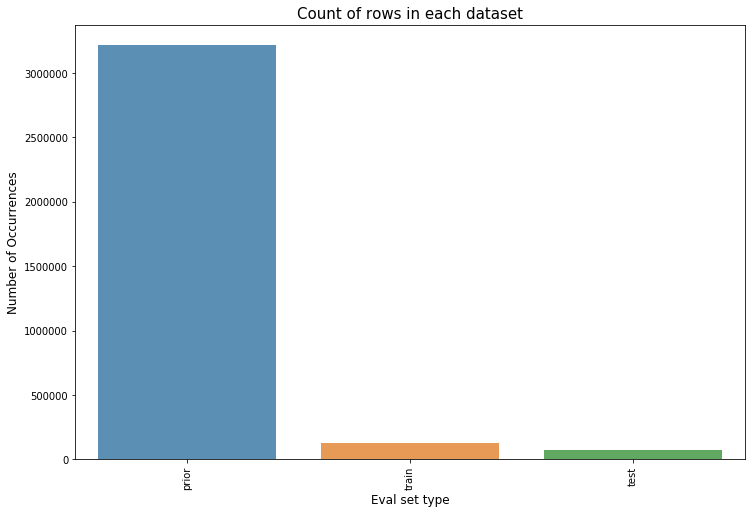

In [0]:
#Looking at the size of the test, train, and prior datasets
cnt_srs = orders.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


In [0]:
# days_since_prior_order has nulls, we need to drop these values for correlations and algorithms
orders.isnull().sum()
orders = orders.dropna()
orders.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [0]:
# the most ordered products
cnt_srs = master_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs


,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


Fruits and vegetables are the most ordered items.

In [0]:
# Produce was the most popular department
cnt_deps = master_df['department'].value_counts().reset_index().head(20)
cnt_deps.columns = ['department_name', 'frequency_count']
cnt_deps


,department_name,frequency_count
0,produce,9479291
1,dairy eggs,5414016
2,snacks,2887550
3,beverages,2690129
4,frozen,2236432
5,pantry,1875577
6,bakery,1176787
7,canned goods,1068058
8,deli,1051249
9,dry goods pasta,866627


Similar to previous table; fruits & vegtables, milk/eggs are popular which means they are reordered often

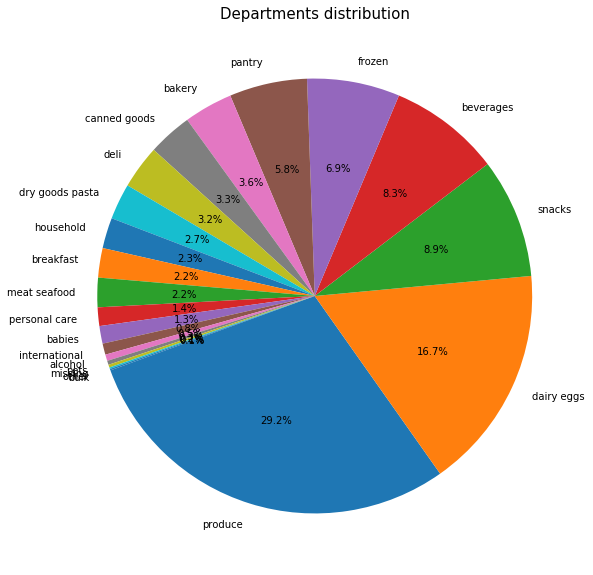

In [0]:
#visualise the departments by number of orders
plt.figure(figsize=(10,10))
temp_series = master_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

In [0]:
# Number of Unique Orders and Unique Products

orders_Unique = len(set(order_products_prior.order_id))
products_Unique = len(set(order_products_prior.product_id))
print(orders_Unique, products_Unique)

# Based on only order_products_prior there are 3,214,874 orders for 49,677 products

3214874 49677


In [0]:
# products most likely to be reordered
grouped = order_products_prior.groupby('product_id')['reordered'].aggregate({'reorder_sum': sum, 'reorder_total': 'count'}).reset_index()
grouped['reorder_probability'] = grouped['reorder_sum'] / grouped['reorder_total']
grouped = pd.merge(grouped, products[['product_id', 'product_name']], how='left', on=['product_id'])
grouped = grouped[grouped.reorder_total > 75].sort_values(['reorder_probability'], ascending=False)[:10]
grouped


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,product_id,reorder_sum,reorder_total,reorder_probability,product_name
2074,2075,81,87,0.93,Serenity Ultimate Extrema Overnight Pads
27734,27740,93,101,0.92,Chocolate Love Bar
35598,35604,90,100,0.90,Maca Buttercups
38243,38251,99,111,0.89,Benchbreak Chardonnay
36794,36801,85,96,0.89,Organic Blueberry B Mega
10232,10236,113,129,0.88,Fragrance Free Clay with Natural Odor Eliminat...
20594,20598,98,112,0.88,Thousand Island Salad Snax
35490,35496,389,451,0.86,Real2 Alkalized Water 500 ml
5454,5457,75,87,0.86,Classic Carbonated Natural Mineral Water
9288,9292,2517,2921,0.86,Half And Half Ultra Pasteurized


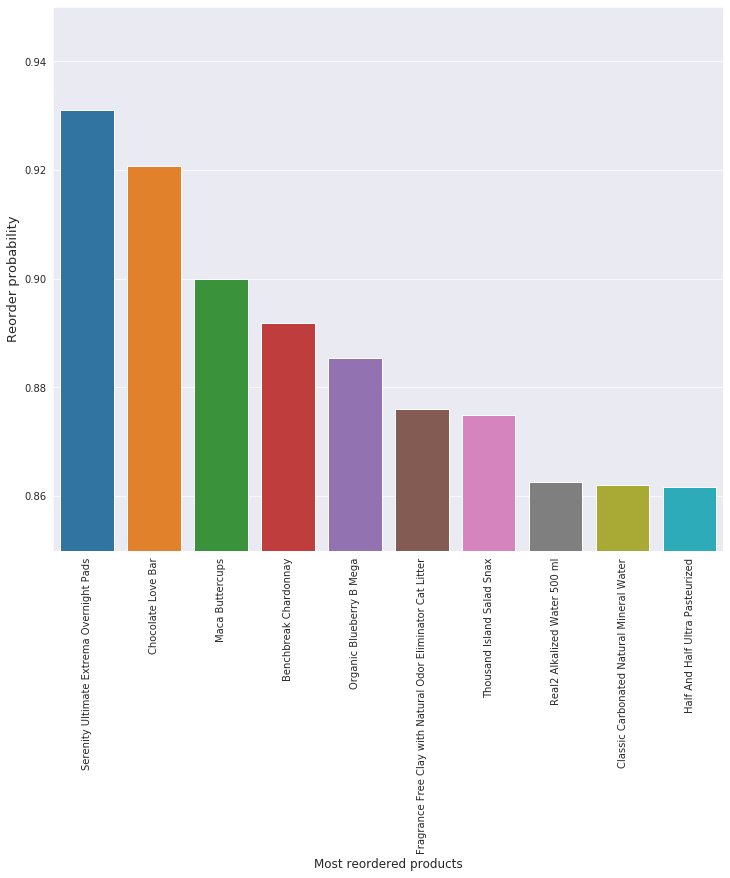

In [0]:
# Bar Plot of products most likely to be reordered
grouped  = grouped.groupby(['product_name']).sum()['reorder_probability'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylim([0.85,0.95])
plt.ylabel('Reorder probability', fontsize=13)
plt.xlabel('Most reordered products', fontsize=12)
plt.show()

# Code from Jahan's EDA Lecture


In [0]:
#drop the columns with string values
corr_df = master_df.drop(['eval_set','aisle','department','product_name'], axis = 1)

In [0]:
#separate input and output columns, output = reordered
X = corr_df.drop(['reordered'], axis = 1).values
Y = corr_df['reordered'].values

In [0]:
## save features as pandas dataframe for stepwise feature selection
X1 = corr_df.drop('reordered', axis = 1)
Y1 = corr_df['reordered']

<Figure size 2160x2160 with 0 Axes>

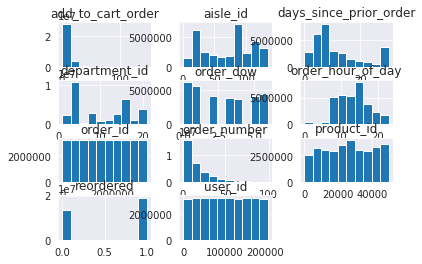

In [0]:
# distribution of data 
# histogram
plt.figure(figsize = (30,30)) # new plot
master_df.hist()
plt.show()

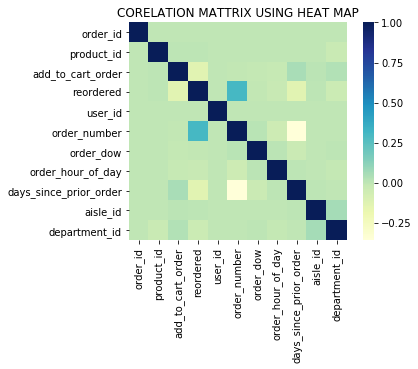

In [0]:
# correlation heat map, pay attention to correlation between all predicators/features and each predictor and the output
plt.figure() # new plot
corMat = master_df.corr(method='pearson')
# plot correlation matrix as a heat map
sns.heatmap(corMat, square=True, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title("CORELATION MATTRIX USING HEAT MAP")
plt.show()

Users that have a large number of orders have a high rate or reordering

In [0]:
#scatter plots were difficult to use in EDA, they are too processor intensive

Testing Section - 50K User Sample


In [0]:
#testing algorithm run speeds
#50k random sampling
corr_df = corr_df.dropna()

reduced_df = random.sample(df[corr_df['user_id']], 50000)
X = reduced_df.drop(['reordered'], axis = 1).values
Y = reduced_df['reordered'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20) 

 #   Bagging ensembles

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=100,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

In [0]:
bag_clf.fit(X_train, y_train)

In [0]:
# determine accuracy score for the bagging method
print(accuracy_score(y_test, y_pred))

Google Colab processors could handle up to 50,000 users but the algorithms took hours.<br>
For the purpose of this project we are using a sample size of 2,500 users to reduce the runtime of prediction algorithms.

# Cross Validation

In [0]:
#imports for plotting and algorithms
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
import random
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB

Algorithm Appraoch: build the model based on the training set. we
make prediction with the test set and calculate error rate by comparing the predicated versus the actual output.<br>
Step 1: separate the train and test group <br>
Step 2: fit the model using training <br>
Step 3: test the model using test <br>

In [0]:
#using the first 25000 users of the unordered set
corr_df = master_df.drop(['eval_set','aisle','department','product_name'], axis = 1)
corr_df = corr_df.dropna()
reduced_df = corr_df[corr_df['user_id']<25000]

X = reduced_df.drop(['reordered'], axis = 1).values
Y = reduced_df['reordered'].values

In [0]:
#step 1, separate data set into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [0]:
#make a list of model to loop through and compare results
models = []
models.append(('LogReg', LogisticRegression(n_jobs=-1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(max_depth=None, random_state=0,n_jobs=-1)))
models.append(('RF2', RandomForestClassifier(max_depth=2, random_state=0,n_jobs=-1)))
models.append(('RF3', RandomForestClassifier(max_depth=3, random_state=0,n_jobs=-1)))
models.append(('RF4', RandomForestClassifier(max_depth=4, random_state=0,n_jobs=-1)))
models.append(('RF5', RandomForestClassifier(max_depth=5, random_state=0,n_jobs=-1)))
models.append(('RF6', RandomForestClassifier(max_depth=6, random_state=0,n_jobs=-1)))
models.append(('RF7', RandomForestClassifier(max_depth=7, random_state=0,n_jobs=-1)))
models.append(('RF10', RandomForestClassifier(max_depth=10, random_state=0,n_jobs=-1)))
models.append(('RF12', RandomForestClassifier(max_depth=12, random_state=0,n_jobs=-1)))
models.append(('RF13', RandomForestClassifier(max_depth=13, random_state=0,n_jobs=-1)))
models.append(('RF14', RandomForestClassifier(max_depth=14, random_state=0,n_jobs=-1)))
models.append(('RF15', RandomForestClassifier(max_depth=15, random_state=0,n_jobs=-1)))
models.append(('RF16', RandomForestClassifier(max_depth=16, random_state=0,n_jobs=-1)))

In [0]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=7)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LogReg: 0.631337 (0.001026)
LDA: 0.667409 (0.000832)
CART: 0.639157 (0.000858)
NB: 0.631340 (0.001026)
RF: 0.696428 (0.000514)
RF2: 0.655781 (0.001976)
RF3: 0.689448 (0.001042)
RF4: 0.693720 (0.000559)
RF5: 0.696525 (0.000437)
RF6: 0.701448 (0.000793)
RF7: 0.702950 (0.000441)
RF10: 0.709473 (0.000732)
RF12: 0.713519 (0.000886)
RF13: 0.714508 (0.000594)
RF14: 0.715671 (0.000525)
RF15: 0.716451 (0.000695)
RF16: 0.716876 (0.000645)


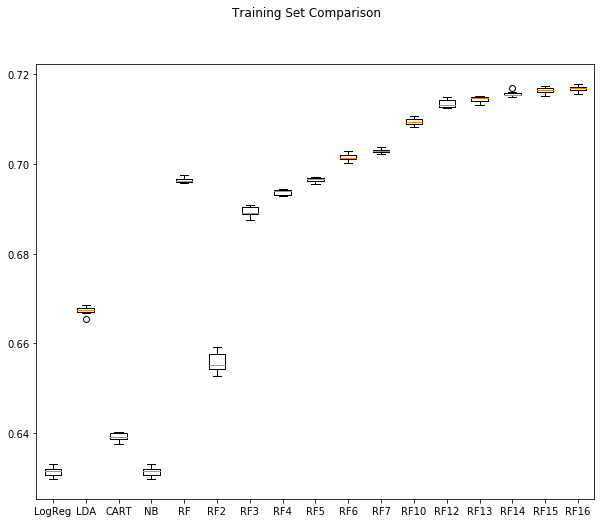

In [0]:
# boxplot algorithm comparison
fig = pyplot.figure(figsize=(10,8))
fig.suptitle('Training Set Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [0]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=7)
	cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LogReg: 0.631392 (0.001732)
LDA: 0.667627 (0.001710)
CART: 0.627800 (0.001707)
NB: 0.631398 (0.001733)
RF: 0.685284 (0.001357)
RF2: 0.653681 (0.002049)
RF3: 0.689808 (0.001999)
RF4: 0.693609 (0.001659)
RF5: 0.696775 (0.001323)
RF6: 0.701404 (0.001517)
RF7: 0.702957 (0.001328)
RF10: 0.708886 (0.001116)
RF12: 0.711973 (0.001425)
RF13: 0.712841 (0.001533)
RF14: 0.712931 (0.001354)
RF15: 0.712730 (0.001323)
RF16: 0.712306 (0.001378)


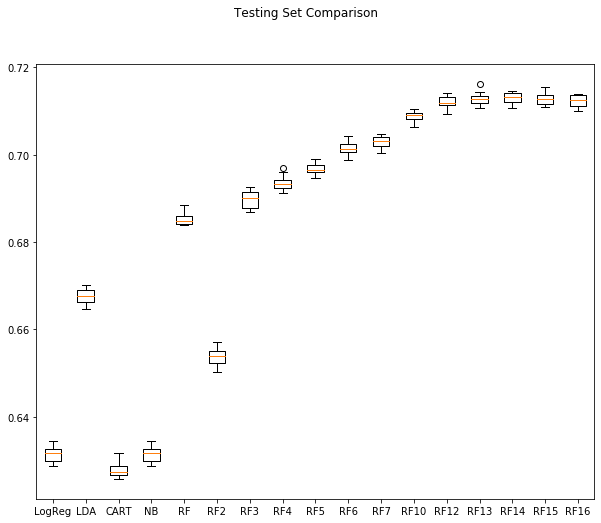

In [0]:
# boxplot algorithm comparison
fig = pyplot.figure(figsize=(10,8))
fig.suptitle('Testing Set Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [0]:
# define roc_curse_plot (from Jahan's Lecture Code)
def plot_roc_curve(fpr, tpr, lable=None):
    plt.plot(fpr,tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

0.6313919528540509


No handles with labels found to put in legend.


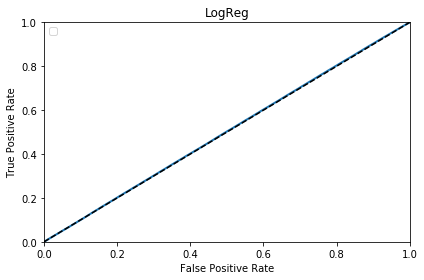

0.667603240414787


No handles with labels found to put in legend.


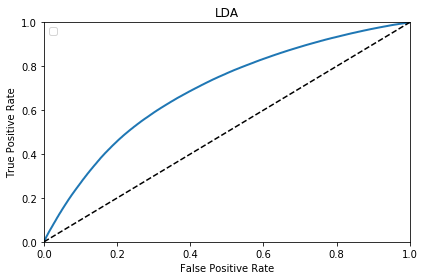

0.642125609533495


No handles with labels found to put in legend.


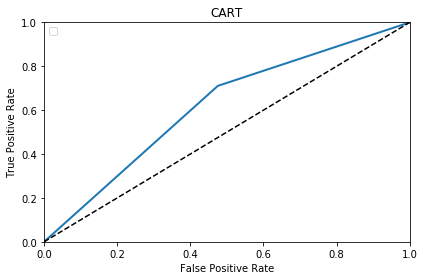

0.6313984719288639


No handles with labels found to put in legend.


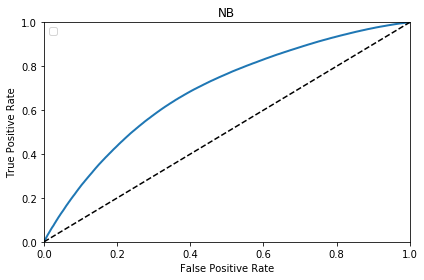

No handles with labels found to put in legend.


0.6982559301850548


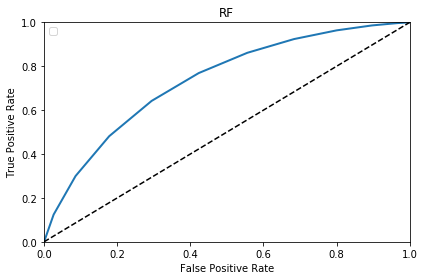

No handles with labels found to put in legend.


0.6535948351543283


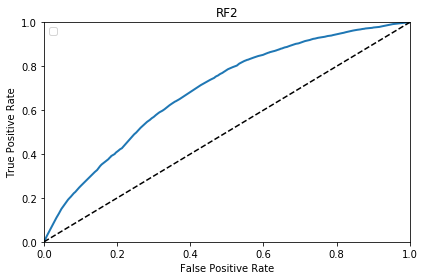

No handles with labels found to put in legend.


0.6902928803010944


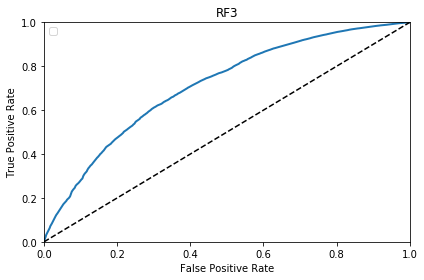

0.6932188583796187


No handles with labels found to put in legend.


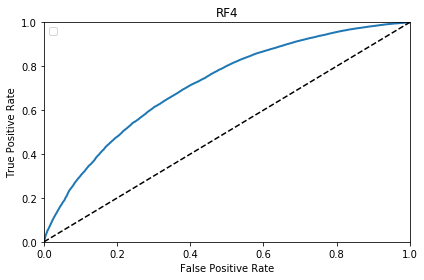

0.6963371491651238


No handles with labels found to put in legend.


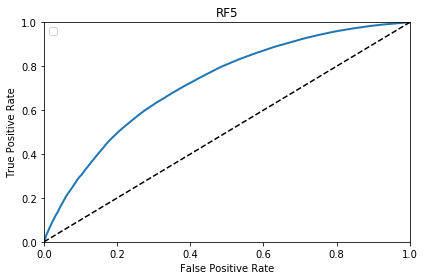

0.7018511999443705


No handles with labels found to put in legend.


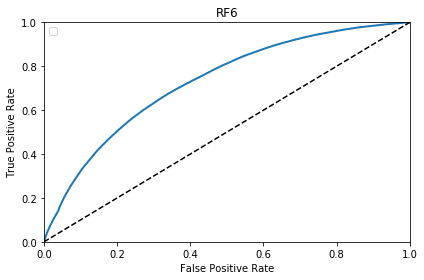

0.703125679070293


No handles with labels found to put in legend.


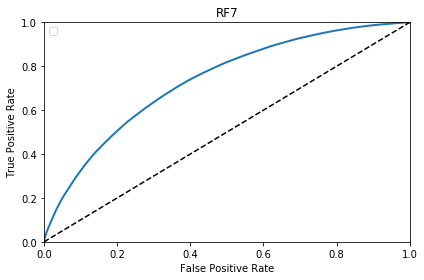

0.7100119950976558


No handles with labels found to put in legend.


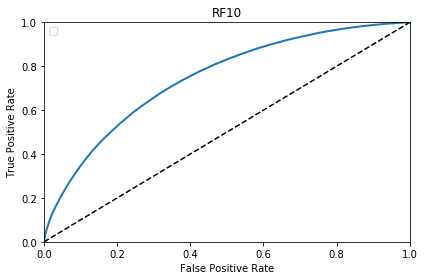

0.713105296096378


No handles with labels found to put in legend.


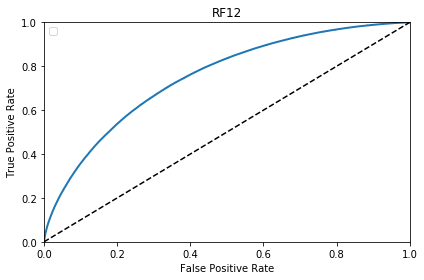

0.7156933687971003


No handles with labels found to put in legend.


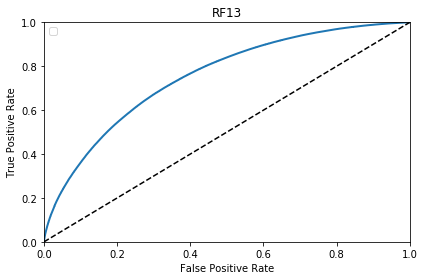

0.7162464036437283


No handles with labels found to put in legend.


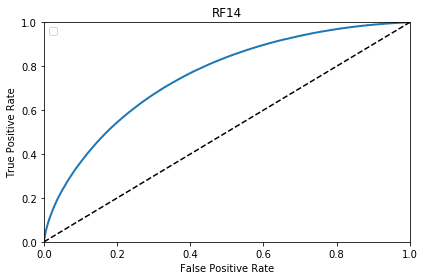

0.7164571870626787


No handles with labels found to put in legend.


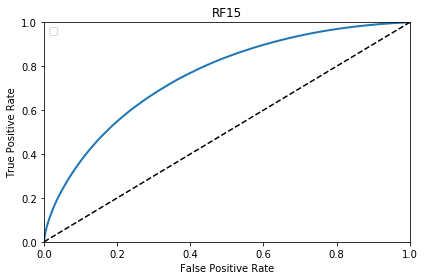

0.7176393126287517


No handles with labels found to put in legend.


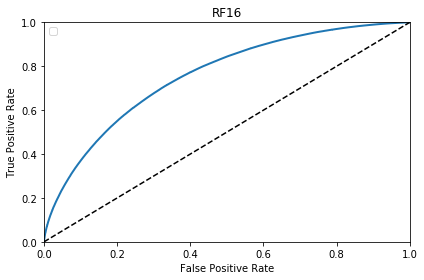

In [0]:
#ROC curves
from sklearn.metrics import roc_curve


for model in models:
  m = model[1]
  m.fit(X_train, y_train)
  y_prob_rf = m.predict_proba(X_test)

  y_pred_rf = m.predict(X_test)

  print(np.sum(y_test == y_pred_rf) / len(y_test))  # almost identical predictions

  y_score_rf = y_prob_rf[:,1]
  fpr_rf,tpr_rf, threshold_rf = roc_curve(y_test, y_score_rf)

  plot_roc_curve(fpr_rf,tpr_rf)
  plt.legend(loc="bottom right")
  plt.title(model[0])
  plt.tight_layout()
  plt.show()

In [0]:
#step 1, create model
logreg = RandomForestClassifier(max_depth=3, random_state=0)

In [0]:
#step 2, fit the model using training data
logreg.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
#step 3: test model vs actual data points
logreg.score(  X_test,y_test)

0.6888966677582177

In [0]:
# Bias is the difference between the average prediction of our
# model and the correct value which we are trying to predict
# Models with high bias pays  little attention to the training data
# and oversimplifies the model.
# Actual mean - predicted mean
abs(y_test.mean() - logreg.predict(X_test).mean())

0.18348219830847234

In [0]:
# Variance is the variability of model prediction for a given data point
# Actual data point - predicted data point
abs(y_test.var()-logreg.predict(X_test).var())

0.08071567521879733

Variance is the variability of model prediction for a given data point:<br>
Actual data point - predicted data point<br>
Bias is the difference between the average prediction of our<br>
model and the correct value which we are trying to predict<br>
Models with high bias pays  little attention to the training data<br>
and oversimplifies the model.<br>
Actual mean - predicted mean

In [0]:
#Variance-Bias Tradeoff - TEST 
for model in models:
  print(model[0])
  print('Bias:',round(abs(y_test.mean() - model[1].predict(X_test).mean()),3))
  print('Variance:',round(abs(y_test.var()-model[1].predict(X_test).var()),3))

LR
Bias: 0.372
Variance: 0.234
LDA
Bias: 0.217
Variance: 0.103
CART
Bias: 0.002
Variance: 0.001
NB
Bias: 0.372
Variance: 0.234
RF2
Bias: 0.307
Variance: 0.173
RF3
Bias: 0.183
Variance: 0.081
RF4
Bias: 0.179
Variance: 0.078
RF5
Bias: 0.17
Variance: 0.072
RF6
Bias: 0.144
Variance: 0.057
RF7
Bias: 0.143
Variance: 0.057
RF8
Bias: 0.147
Variance: 0.059
RF9
Bias: 0.132
Variance: 0.051
RF10
Bias: 0.131
Variance: 0.051


In [0]:
#Variance-Bias Tradeoff - TRAIN
for model in models:
  print(model[0])
  print('Bias:',round(abs(y_train.mean() - model[1].predict(X_train).mean()),3))
  print('Variance:',round(abs(y_train.var()-model[1].predict(X_train).var()),3))

LR
Bias: 0.373
Variance: 0.234
LDA
Bias: 0.219
Variance: 0.104
CART
Bias: 0.0
Variance: 0.0
NB
Bias: 0.373
Variance: 0.234
RF2
Bias: 0.309
Variance: 0.174
RF3
Bias: 0.184
Variance: 0.081
RF4
Bias: 0.178
Variance: 0.077
RF5
Bias: 0.17
Variance: 0.072
RF6
Bias: 0.143
Variance: 0.057
RF7
Bias: 0.142
Variance: 0.056
